In [1]:
PATH_CSV='~/Downloads/DadosEstatsticos.csv'

In [54]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as se
import statsmodels.stats.proportion as smp
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv(PATH_CSV,sep=';',decimal=',', encoding='cp1252')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886509 entries, 0 to 886508
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   EMPRESA (SIGLA)                    886509 non-null  object 
 1   EMPRESA (NOME)                     886509 non-null  object 
 2   EMPRESA (NACIONALIDADE)            886509 non-null  object 
 3   ANO                                886509 non-null  int64  
 4   MÊS                                886509 non-null  int64  
 5   AEROPORTO DE ORIGEM (SIGLA)        881295 non-null  object 
 6   AEROPORTO DE ORIGEM (NOME)         881295 non-null  object 
 7   AEROPORTO DE ORIGEM (UF)           761974 non-null  object 
 8   AEROPORTO DE ORIGEM (REGIÃO)       761987 non-null  object 
 9   AEROPORTO DE ORIGEM (PAÍS)         881295 non-null  object 
 10  AEROPORTO DE ORIGEM (CONTINENTE)   881295 non-null  object 
 11  AEROPORTO DE DESTINO (SIGLA)       8865

In [4]:
data.describe()

,ANO,MÊS,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),ASK,RPK,ATK,...,COMBUSTÍVEL (LITROS),DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
count,886509.000000,886509.000000,841719.000000,841719.000000,8.417190e+05,841719.000000,841719.000000,6.693110e+05,6.697930e+05,6.693110e+05,...,5.759440e+05,6.693110e+05,669847.000000,6.697930e+05,6.693070e+05,6.697930e+05,669846.000000,6.698460e+05,6.693290e+05,713859.000000
mean,2009.606717,6.460133,1929.220643,41.811299,2.376162e+04,247.191185,2443.227222,6.215786e+06,4.713202e+06,9.966245e+05,...,1.496742e+05,3.483849e+04,26.859036,1.535391e+08,7.167773e+05,6.143064e+06,3693.092381,4.677221e+05,7.415145e+01,23340.739691
std,5.900236,3.483967,4484.415889,154.505241,9.281107e+04,1982.754998,22814.800649,1.605653e+07,1.309124e+07,2.749385e+06,...,3.513374e+05,6.645658e+04,46.488975,6.792731e+08,9.192850e+06,4.733786e+07,7279.524038,8.369953e+05,1.266467e+04,52087.003366
min,2000.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.971210e+05,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2004.000000,3.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,2.131200e+04,0.000000e+00,1.549600e+04,...,5.128000e+03,1.644000e+03,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,70.000000,2.240000e+04,3.470000e+00,85.000000
50%,2010.000000,6.000000,206.000000,0.000000,3.200000e+01,0.000000,0.000000,5.094360e+05,2.876400e+05,1.305980e+05,...,2.673600e+04,8.584000e+03,11.000000,2.466750e+05,0.000000e+00,0.000000e+00,694.000000,1.352000e+05,1.910000e+01,2766.000000
75%,2015.000000,10.000000,1773.000000,20.000000,7.597000e+03,0.000000,0.000000,4.587125e+06,3.045500e+06,6.788145e+05,...,1.516125e+05,3.549250e+04,31.000000,1.744210e+07,0.000000e+00,0.000000e+00,4563.000000,5.520288e+05,6.802000e+01,20658.000000
max,2020.000000,12.000000,92357.000000,7452.000000,4.018286e+06,189562.000000,825678.000000,3.173240e+08,2.699140e+08,5.928730e+07,...,6.704640e+06,1.015740e+06,918.000000,2.004060e+10,1.373030e+09,2.750410e+09,154845.000000,2.319650e+07,1.036100e+07,919417.000000


In [5]:
data.head()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),...,COMBUSTÍVEL (LITROS),DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,...,NaN,247320.0,30.0,8.068900e+08,0.0,601812.0,6330.0,1050000.0,409.08,NaN
1,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,...,NaN,224141.0,29.0,3.715020e+08,0.0,62094800.0,6119.0,464000.0,418.10,NaN
2,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,...,NaN,222256.0,29.0,1.494460e+09,0.0,15174700.0,6119.0,1015000.0,411.50,NaN
3,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,...,NaN,208227.0,31.0,8.119980e+08,46495100.0,230689000.0,6541.0,1077000.0,491.80,NaN


In [156]:
colsSelected = ['EMPRESA (SIGLA)','EMPRESA (NOME)','ANO','MÊS','COMBUSTÍVEL (LITROS)','HORAS VOADAS']
cols = ['empresa','empresa_nome','ano','mes','comb','hrsvoo']
nData = data[colsSelected]
nData.columns = cols
nData

,empresa,empresa_nome,ano,mes,comb,hrsvoo
0,AAL,"AMERICAN AIRLINES, INC.",2000,1,NaN,409.080
1,AAL,"AMERICAN AIRLINES, INC.",2000,1,NaN,418.100
2,AAL,"AMERICAN AIRLINES, INC.",2000,1,NaN,411.500
3,AAL,"AMERICAN AIRLINES, INC.",2000,1,NaN,NaN
4,AAL,"AMERICAN AIRLINES, INC.",2000,1,NaN,491.800
...,...,...,...,...,...,...
886504,WAL,CARIBBEAN SUN AIRLINES DBA WORLD ATLANTIC AIRL...,2020,5,0.0,4.250
886505,WAL,CARIBBEAN SUN AIRLINES DBA WORLD ATLANTIC AIRL...,2020,5,NaN,NaN
886506,WAL,CARIBBEAN SUN AIRLINES DBA WORLD ATLANTIC AIRL...,2020,6,NaN,NaN
886507,WAL,CARIBBEAN SUN AIRLINES DBA WORLD ATLANTIC AIRL...,2020,6,0.0,5.667


In [239]:
df = pd.DataFrame(nData, columns=cols)
df0 = df.groupby(['empresa']).hrsvoo.sum()
df0.sort_values( ascending=False, inplace=True)
df0.head(20)

empresa
AFR    1.084230e+07
TAM    9.352463e+06
GLO    7.151522e+06
AZU    3.541970e+06
VRG    2.198587e+06
ONE    1.363871e+06
AAL    1.279465e+06
TAP    1.028755e+06
TIB    7.729190e+05
CMP    5.646834e+05
UAL    5.567327e+05
VSP    5.521750e+05
DAL    4.839219e+05
ARG    4.289677e+05
PUA    3.943843e+05
DLH    3.921565e+05
LAN    3.768558e+05
PTB    3.692096e+05
RSL    3.547534e+05
IBE    3.260281e+05
Name: hrsvoo, dtype: float64

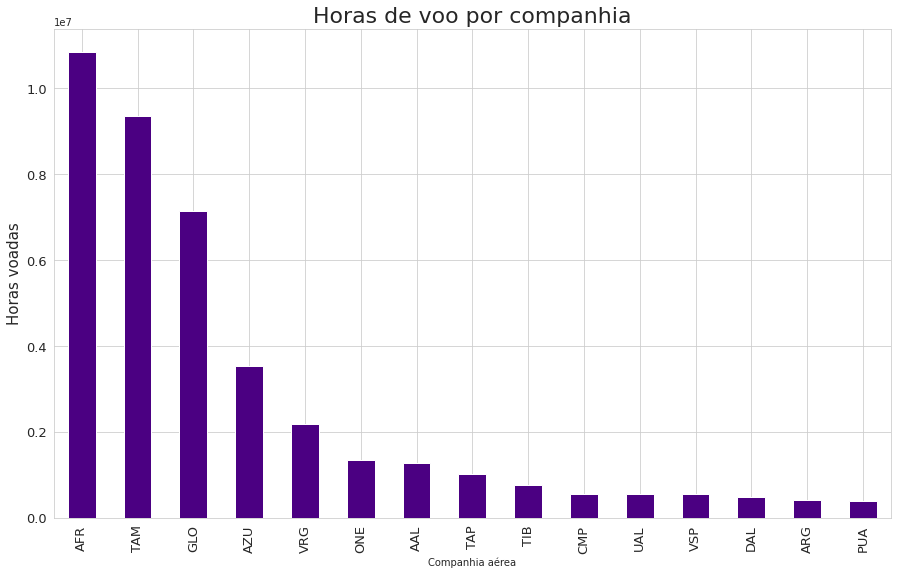

In [240]:
ax = df0[:15].plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Horas de voo por companhia", fontsize=22)
ax.set_ylabel("Horas voadas", fontsize=15);
ax.set_xlabel("Companhia aérea", fontsize=10);
plt.show()


Text(0.5, 1.0, 'Histograma')

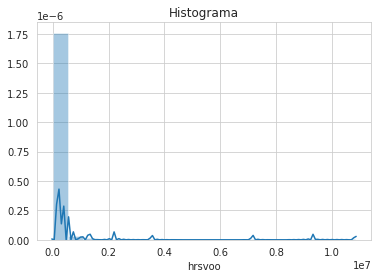

In [241]:
se.distplot(df0, bins=20).set_title('Histograma')

Text(0.5, 1.0, 'box')

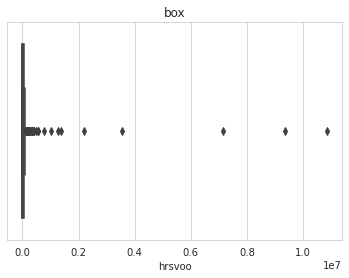

In [242]:
se.boxplot(df0).set_title('box')

In [178]:
# nData.info()
afr = nData.query('empresa=="AFR"')
afr

,empresa,empresa_nome,ano,mes,comb,hrsvoo
538,AFR,SOCIÉTÉ AIR FRANCE,2000,1,NaN,8.920
539,AFR,SOCIÉTÉ AIR FRANCE,2000,1,NaN,109.800
540,AFR,SOCIÉTÉ AIR FRANCE,2000,1,NaN,58.230
541,AFR,SOCIÉTÉ AIR FRANCE,2000,1,NaN,137.800
542,AFR,SOCIÉTÉ AIR FRANCE,2000,1,NaN,280.350
...,...,...,...,...,...,...
865209,AFR,SOCIÉTÉ AIR FRANCE,2020,10,0.0,181.452
865210,AFR,SOCIÉTÉ AIR FRANCE,2020,10,0.0,324.982
865211,AFR,SOCIÉTÉ AIR FRANCE,2020,10,0.0,24.534
865212,AFR,SOCIÉTÉ AIR FRANCE,2020,10,0.0,178.036


## Análise da AFR (SOCIÉTÉ AIR FRANCE)

Text(0.5, 1.0, 'Histograma')

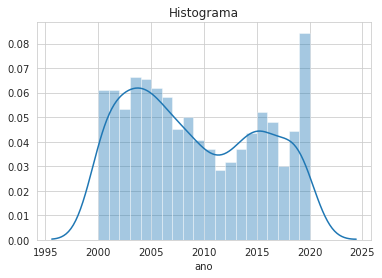

In [243]:
se.distplot(afr['ano'], bins=20).set_title('Histograma')

In [244]:
afr0 = nData.query('empresa=="AFR" and ano==2020')
afr0['mes'].describe()

count    53.000000
mean      5.226415
std       3.029607
min       1.000000
25%       3.000000
50%       5.000000
75%       8.000000
max      10.000000
Name: mes, dtype: float64

Text(0.5, 1.0, 'Box-plot')

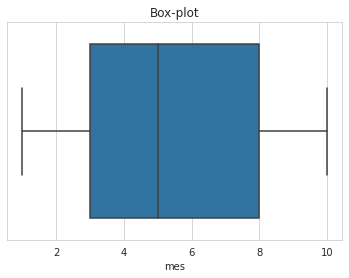

In [245]:
se.boxplot(afr0['mes']).set_title('Box-plot')

In [263]:
dfAfr = pd.DataFrame(afr0, columns=cols)
dfAfr0 = dfAfr.groupby(['mes']).hrsvoo.sum()
# dfAfr0.sort_values(ascending=False, inplace=True)
dfAfr0.head(12)

mes
1     2.581936e+03
2     2.439834e+03
3     1.036255e+07
4     3.604820e+02
5     3.995520e+02
6     7.269020e+02
7     7.597330e+02
8     7.908680e+02
9     8.062530e+02
10    1.048290e+03
Name: hrsvoo, dtype: float64